# Classification Problem

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.feature_selection import VarianceThreshold , mutual_info_classif , mutual_info_regression
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [6]:
path = (r"/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/02 Feature Selection/datasets/Data-Files-for-Feature-Selection/santander-train.csv")
data = pd.read_csv(path,nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
X = data.drop("TARGET" , axis = 1)
y = data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , 
                                                       random_state = 0 , stratify = y)

## Remove Constant, Quasi-constant and duplicate Features

In [0]:
constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [0]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [0]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [12]:
X_train_T.duplicated().sum()

18

In [0]:
duplicated_features = X_train_T.duplicated()

In [0]:
features_to_keep = [not index for index in duplicated_features]

In [0]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [17]:
X_train_unique.shape , X_test_unique.shape

((16000, 227), (4000, 227))

## Calculate the Mutual Information

In [18]:
mi = mutual_info_classif(X_train_unique , y_train)
mi

array([2.60248016e-03, 3.30636317e-03, 1.36937395e-02, 1.51097298e-03,
       0.00000000e+00, 1.88550589e-03, 0.00000000e+00, 0.00000000e+00,
       5.88632043e-04, 7.78100634e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01232960e-03, 3.69366532e-03, 9.03969761e-04,
       0.00000000e+00, 1.76702723e-03, 0.00000000e+00, 0.00000000e+00,
       3.00724517e-04, 5.18331561e-03, 8.81353360e-03, 1.91089244e-03,
       8.23936936e-04, 2.46087810e-03, 0.00000000e+00, 3.02639191e-03,
       1.21431914e-03, 3.99573800e-03, 3.70756709e-03, 0.00000000e+00,
       1.31101298e-04, 2.24764603e-03, 0.00000000e+00, 1.31348700e-03,
       0.00000000e+00, 0.00000000e+00, 1.08823044e-02, 0.00000000e+00,
       0.00000000e+00, 1.59143899e-03, 2.16837781e-03, 1.12641376e-03,
       1.74495735e-03, 8.94292100e-03, 4.34427495e-03, 9.50913949e-03,
       1.45030556e-03, 0.00000000e+00, 3.32389179e-03, 0.00000000e+00,
       3.00383127e-04, 2.45075165e-03, 0.00000000e+00, 0.00000000e+00,
      

In [19]:
len(mi)

227

In [0]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [0]:
mi.sort_values(ascending=False , inplace = True)

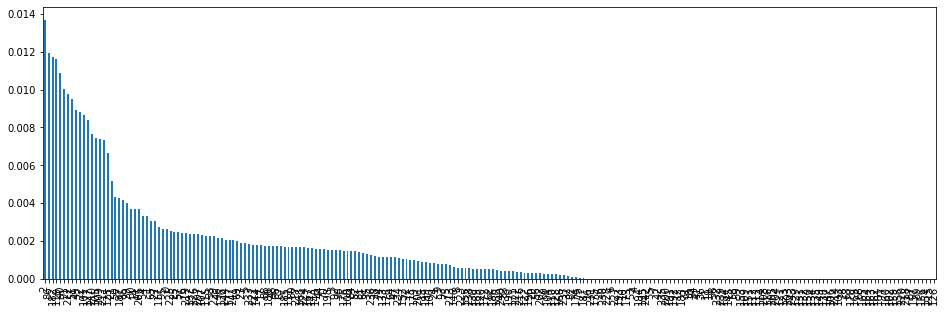

In [22]:
mi.plot.bar(figsize = (16,5))

In [24]:
# Select top 10 percentile of 227 features ie about 23 features
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique , y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  21,  22,  27,  40,  49,  50,  51,  85,  86,  91,  95, 101,
            105, 111, 119, 125, 127, 182, 209, 210, 211, 212],
           dtype='int64')

In [25]:
len(X_train_unique.columns[sel.get_support()])

23

In [26]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature scores, None if `score_func` returned only scores.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.datasets import load_digits
 |  >

In [0]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [28]:
X_train_mi.shape

(16000, 23)

## Build the model and compare the performances

In [0]:
def run_randomForest(X_train , X_test , y_train , y_test):
    clf = RandomForestClassifier(n_estimators=100 , random_state= 0 , n_jobs = -1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on the test set: ")
    print(accuracy_score(y_test, y_pred))

In [30]:
%%time
run_randomForest(X_train_mi , X_test_mi , y_train , y_test)

Accuracy on the test set: 
0.95825
CPU times: user 2.12 s, sys: 18 ms, total: 2.14 s
Wall time: 1.26 s


In [31]:
%%time
run_randomForest(X_train , X_test , y_train , y_test)

Accuracy on the test set: 
0.9585
CPU times: user 5.07 s, sys: 29.8 ms, total: 5.1 s
Wall time: 2.79 s


In [32]:
(2.79- 1.26)/2.79

0.5483870967741935

## Mutual Information Gain in Regression

In [0]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [0]:
boston = load_boston()

In [35]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
X = pd.DataFrame(data = boston.data , columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
y = boston.target

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 0 )

In [0]:
mi = mutual_info_regression(X_train , y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False , inplace = True)

In [42]:
mi

LSTAT      0.680709
RM         0.562317
INDUS      0.521019
PTRATIO    0.494511
NOX        0.455426
TAX        0.392283
CRIM       0.344433
AGE        0.344238
DIS        0.323064
RAD        0.207438
ZN         0.202323
B          0.139275
CHAS       0.010589
dtype: float64

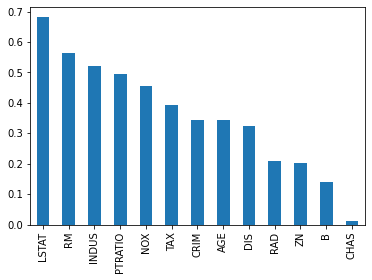

In [43]:
mi.plot.bar()

In [45]:
sel = SelectKBest(mutual_info_regression , k = 9).fit(X_train , y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [61]:
model = LinearRegression()
model.fit(X_train , y_train)
y_predict = model.predict(X_test)
r2_score(y_test,y_predict)

0.5892223849182512

In [62]:
np.sqrt(mean_squared_error(y_test , y_predict))

5.783509315085133

In [63]:
np.std(y)

9.188011545278203

In [64]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [0]:
X_test_9 = sel.transform(X_test)

In [66]:
model = LinearRegression()
model.fit(X_train_9 , y_train)
y_predict = model.predict(X_test_9)
r2_score(y_test , y_predict)

0.5317127606961575

In [67]:
print("rmse")
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


6.175103151293748